In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8723 - loss: 0.4413 - val_accuracy: 0.9518 - val_loss: 0.1796
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9626 - loss: 0.1245 - val_accuracy: 0.9672 - val_loss: 0.1154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9738 - loss: 0.0848 - val_accuracy: 0.9681 - val_loss: 0.1182
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9796 - loss: 0.0661 - val_accuracy: 0.9737 - val_loss: 0.0994
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9753 - val_loss: 0.1025
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9877 - loss: 0.0430 - val_accuracy: 0.9724 - val_loss: 0.1158
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9726 - val_loss: 0.1234
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9910 - loss: 0.031

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1552
Test accuracy: 0.9735


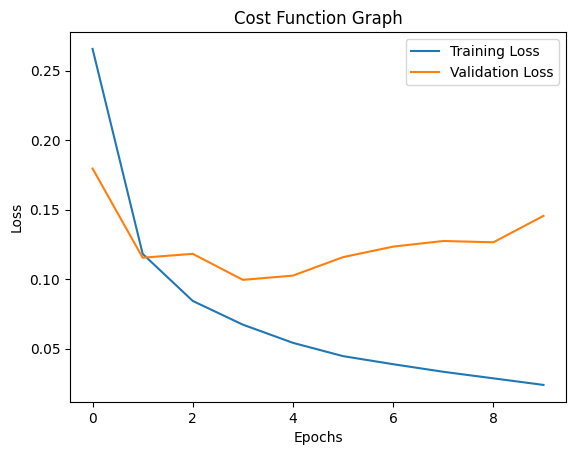

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost Function Graph')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LR=0.001 -> Test Accuracy: 0.9667, Loss: 0.1037
LR=0.003 -> Test Accuracy: 0.9333, Loss: 0.1722
LR=0.01 -> Test Accuracy: 0.9667, Loss: 0.0694


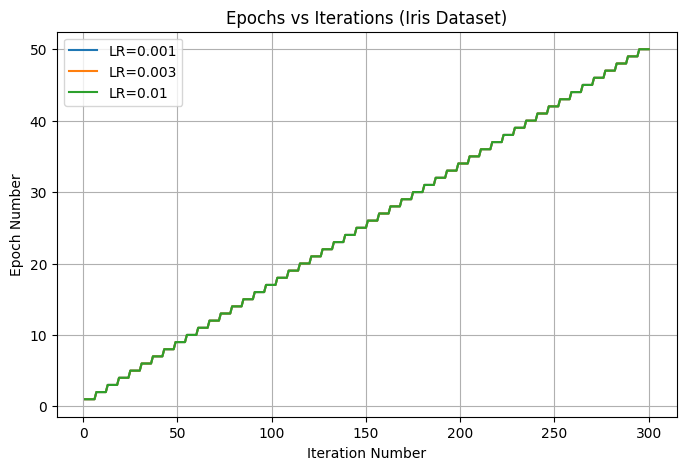

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ===== Load Iris dataset =====
df = pd.read_csv("/content/cleaned iris.csv")

# Features and labels
X = df.drop(columns=['species']).astype('float32')
y = df['species']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# Reshape to mimic "image" format for Flatten layer (2x2)
X_train = X_train.values.reshape(-1, 2, 2)
X_test = X_test.values.reshape(-1, 2, 2)

# Steps per epoch (for tracking iterations)
batch_size = 16
steps_per_epoch = int(np.ceil((len(X_train) * 0.8) / batch_size))

# ===== Callback to track iterations & epochs =====
class EpochIterationTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.epochs_list = []
        self.iterations_list = []

    def on_train_batch_end(self, batch, logs=None):
        current_epoch = len(self.iterations_list) // steps_per_epoch + 1
        iteration_number = len(self.iterations_list) + 1
        self.epochs_list.append(current_epoch)
        self.iterations_list.append(iteration_number)

# ===== Function to train with given learning rate =====
def train_with_lr(lr):
    model = Sequential([
        Flatten(input_shape=(2, 2)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    tracker = EpochIterationTracker()

    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_split=0.2,
                        callbacks=[tracker],
                        verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"LR={lr} -> Test Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")

    return tracker

# ===== Train with different learning rates =====
learning_rates = [0.001, 0.003, 0.01]
trackers = []

for lr in learning_rates:
    trackers.append(train_with_lr(lr))

# ===== Plot Epochs vs Iterations =====
plt.figure(figsize=(8, 5))
for lr, tracker in zip(learning_rates, trackers):
    plt.plot(tracker.iterations_list, tracker.epochs_list, label=f"LR={lr}")

plt.xlabel('Iteration Number')
plt.ylabel('Epoch Number')
plt.title('Epochs vs Iterations (Iris Dataset)')
plt.legend()
plt.grid(True)
plt.show()



Training with learning rate = 0.001...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8665 - loss: 0.4565 - val_accuracy: 0.9609 - val_loss: 0.1342
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9625 - loss: 0.1262 - val_accuracy: 0.9668 - val_loss: 0.1178
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9748 - loss: 0.0869 - val_accuracy: 0.9694 - val_loss: 0.1053
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9694 - val_loss: 0.1068
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9858 - loss: 0.0498 - val_accuracy: 0.9725 - val_loss: 0.1203
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9724 - val_loss: 0.1144
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0346 - val_accuracy: 0.9746 - val_loss: 0.1218
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/

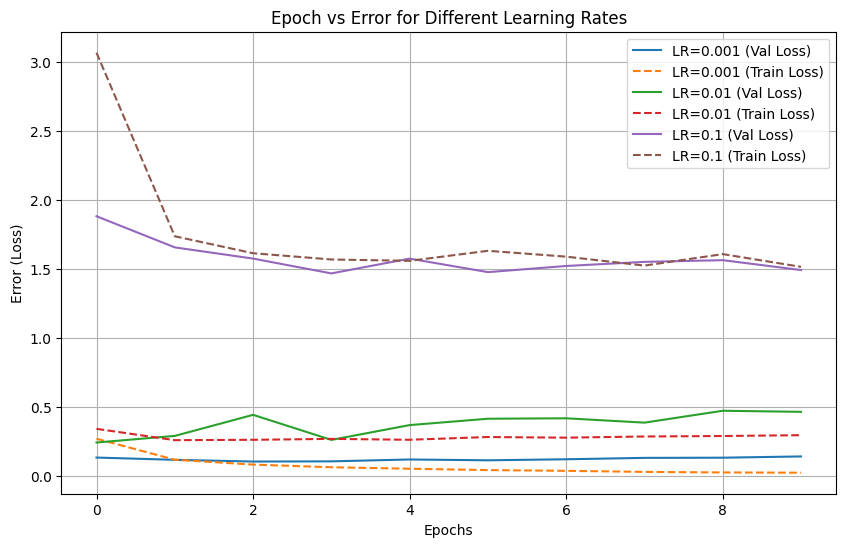

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1]
histories = {}

# Train model for each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}...")

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

    histories[lr] = history

# Plotting Epoch vs Error for different learning rates
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'LR={lr} (Val Loss)')
    plt.plot(history.history['loss'], linestyle='--', label=f'LR={lr} (Train Loss)')

plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.title('Epoch vs Error for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()



Training with learning rate = 0.001...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8701 - loss: 0.4430 - val_accuracy: 0.9564 - val_loss: 0.1475
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9612 - loss: 0.1295 - val_accuracy: 0.9679 - val_loss: 0.1111
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9748 - loss: 0.0824 - val_accuracy: 0.9719 - val_loss: 0.1005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9803 - loss: 0.0655 - val_accuracy: 0.9694 - val_loss: 0.1165
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 0.0549 - val_accuracy: 0.9755 - val_loss: 0.0910
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9887 - loss: 0.0417 - val_accuracy: 0.9737 - val_loss: 0.1125
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0359 - val_accuracy: 0.9758 - val_loss: 0.1049
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4m

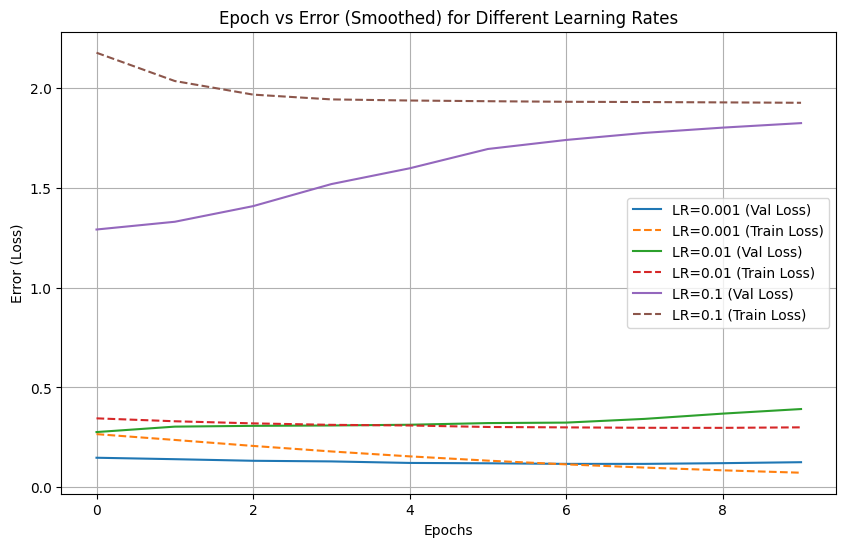

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1]
histories = {}

# Train model for each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}...")

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

    histories[lr] = history

# ===== Smoothing function =====
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for p in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + p * (1 - factor))
        else:
            smoothed_points.append(p)
    return smoothed_points

# Plotting Epoch vs Error for different learning rates (Smoothed)
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    val_loss_smooth = smooth_curve(history.history['val_loss'])
    train_loss_smooth = smooth_curve(history.history['loss'])

    plt.plot(val_loss_smooth, label=f'LR={lr} (Val Loss)')
    plt.plot(train_loss_smooth, linestyle='--', label=f'LR={lr} (Train Loss)')

plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.title('Epoch vs Error (Smoothed) for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()



Training with learning rate = 0.001...
Epoch 1/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.4535 - val_accuracy: 0.9568 - val_loss: 0.1411
Epoch 2/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9636 - loss: 0.1207 - val_accuracy: 0.9702 - val_loss: 0.1080
Epoch 3/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9756 - loss: 0.0806 - val_accuracy: 0.9666 - val_loss: 0.1252
Epoch 4/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9804 - loss: 0.0620 - val_accuracy: 0.9689 - val_loss: 0.1220
Epoch 5/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9843 - loss: 0.0519 - val_accuracy: 0.9700 - val_loss: 0.1250
Epoch 6/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9886 - loss: 0.0377 - val_accuracy: 0.9753 - val_loss: 0.1104
Epoch 7/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9715 - val_loss: 0.1275
Epoch 8/17
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms

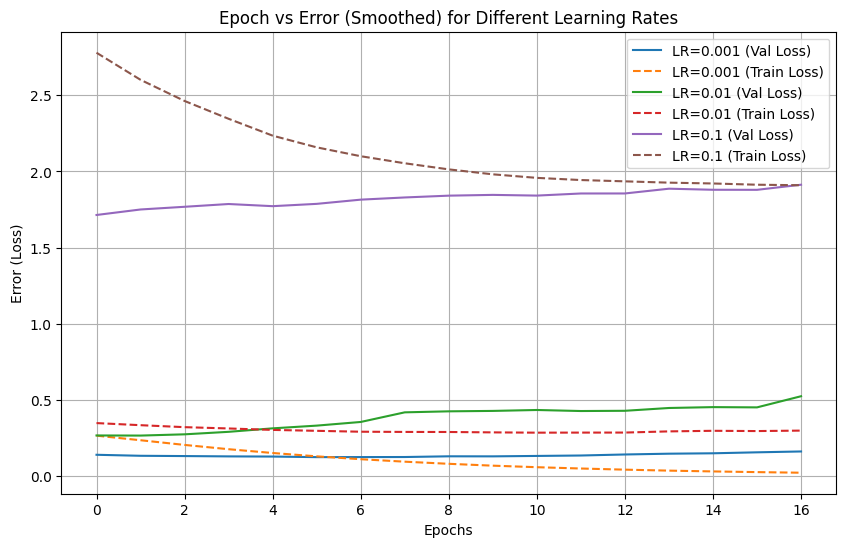

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Learning rates to test
learning_rates = [0.001, 0.01, 0.1]
histories = {}

# Train model for each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}...")

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=17,  # Changed from 10 to 17
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

    histories[lr] = history

# ===== Smoothing function =====
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for p in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + p * (1 - factor))
        else:
            smoothed_points.append(p)
    return smoothed_points

# Plotting Epoch vs Error for different learning rates (Smoothed)
plt.figure(figsize=(10, 6))
for lr, history in histories.items():
    val_loss_smooth = smooth_curve(history.history['val_loss'])
    train_loss_smooth = smooth_curve(history.history['loss'])

    plt.plot(val_loss_smooth, label=f'LR={lr} (Val Loss)')
    plt.plot(train_loss_smooth, linestyle='--', label=f'LR={lr} (Train Loss)')

plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.title('Epoch vs Error (Smoothed) for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()
